# Exercises 06

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Exercise 06.1 - 1D Ising model

All pictures are done using  $\mu_B=1$ and $k_B=1$.

The pictures refer to the Ising model which modelizes a ferromagnetic material. The model consist of a lattice in general - in our case is done in a one dimensional space - with a spin in each site. Spins can in this case only assume discrete values of up and down (ie +1/2 and -1/2).

Each quantity has been calculated per spin.

### <span style="color:green"> behaviour of thermodynamics quantity </span>

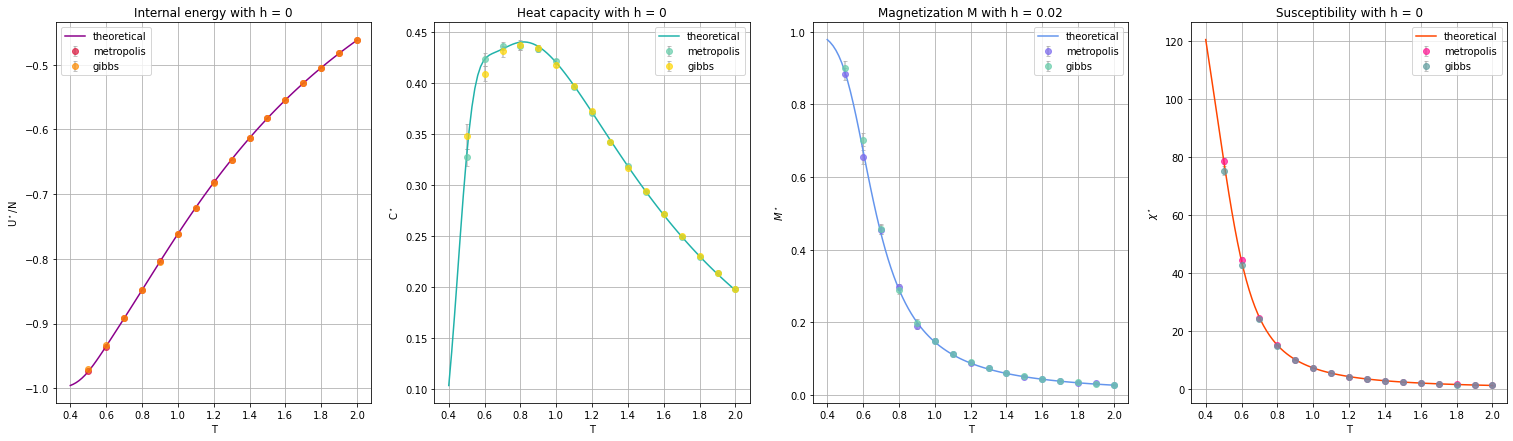

In [6]:
path = "Metropolis/output.ene.0"
temp, ene, err_ene = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

fig1, (ax1, ax2, ax3, ax4)=plt.subplots(1,4,  figsize=(26, 7))

ax1.errorbar(temp,ene,yerr=err_ene, label = 'metropolis', ecolor = "darkgray", capsize = 2, fmt= 'o', c="crimson", alpha =0.7)
ax1.grid("True")

path = "Gibbs/output.ene.0"
temp, ene, err_ene = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
ax1.errorbar(temp,ene,yerr=err_ene, label = 'gibbs', ecolor = "darkgray", capsize = 2, fmt= 'o', c="darkorange", alpha = 0.7)
points=100
T = np.linspace(0.4,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
ax1.plot(T, e, label = 'theoretical', color="darkmagenta")
ax1.set_title('Internal energy with h = 0')
ax1.set_xlabel('T')
ax1.set_ylabel('U$^\star$/N')


path = "Metropolis/output.heat.0"
temp, heat, err_heat = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

ax2.errorbar(temp,heat,yerr=err_heat, label = 'metropolis', ecolor = "darkgray", capsize = 2, fmt= 'o',c='mediumaquamarine', alpha=0.7)
ax2.grid("True")

path = "Gibbs/output.heat.0"
temp, heat, err_heat = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

ax2.errorbar(temp,heat,yerr=err_heat, label = 'gibbs', ecolor = "darkgrey", capsize = 2, fmt= 'o',c='gold', alpha=0.7)

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
ax2.plot(T, heat, label = 'theoretical', c = "lightseagreen" )
ax2.set_title('Heat capacity with h = 0')
ax2.set_xlabel('T')
ax2.set_ylabel('C$^\star$')

path = "Metropolis/output.mag.0"
temp, mag, err_mag = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

ax3.errorbar(temp,mag,yerr=err_mag, label = 'metropolis', ecolor = "darkgray", capsize = 2, fmt= 'o',c='mediumslateblue', alpha=0.7)
ax3.grid("True")

path = "Gibbs/output.mag.0"
temp, mag, err_mag = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

ax3.errorbar(temp,mag,yerr=err_mag, label = 'gibbs', ecolor = "darkgray", capsize = 2, fmt= 'o',c='mediumaquamarine', alpha=0.7)

h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
ax3.plot(T, M, label = 'theoretical', c = "cornflowerblue")
ax3.set_title('Magnetization M with h = 0.02')
ax3.set_xlabel('T')
ax3.set_ylabel('$M$$^\star$')

path = "Metropolis/output.chi.0"
temp, chi, err_chi = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

ax4.errorbar(temp,chi,yerr=err_chi, label = 'metropolis', ecolor = "darkgray", capsize = 2, fmt= 'o', c = 'deeppink', alpha = 0.7)
ax4.grid("True")

path = "Gibbs/output.chi.0"
temp, chi, err_chi = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

ax4.errorbar(temp,chi,yerr=err_chi, label = 'gibbs', ecolor = "darkgray", capsize = 2, fmt= 'o', c = 'cadetblue', alpha = 0.7)

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
ax4.plot(T, X, label = 'theoretical', c = "orangered" )
ax4.set_title('Susceptibility with h = 0')
ax4.set_xlabel('T')
ax4.set_ylabel('$\chi$$^\star$')


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

The pictures above the bevahiour of four of the thermodynamics quantity (the internal energy, the heat capacity, the magnetization and the susceptibility) in the 1D Ising Model. The simulation was done twice using two different samplings: Metropolis and Gibbs.

In every picture three graphs are shown: the continuos line indicates the theoretical prediction, whereas the different color dots indicate the two different samplings.

Both samplings are in accordance with the model; in fact, almost every dot is compatibile within one $\sigma$ with the expected value and all within 2 $\sigma$.

The peak in the heat capacity also shows that no phase transition did occur otherwise it would have diverged.

### <span style="color:green"> errors comparison </span>

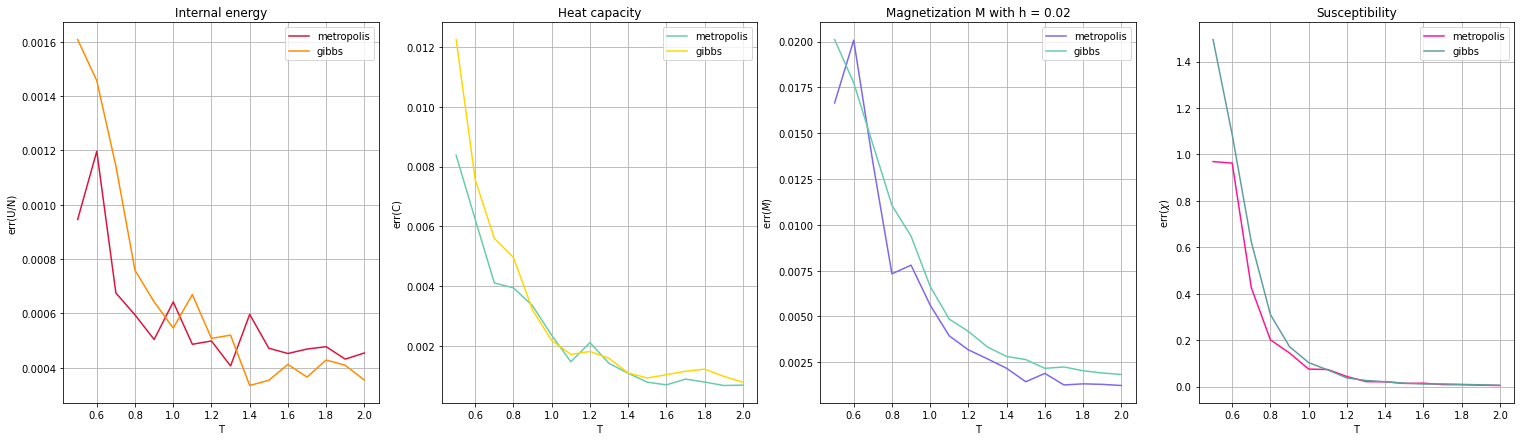

In [11]:
path = "Metropolis/output.ene.0"
temp_m, ene_m, err_ene_m = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
path = "Gibbs/output.ene.0"
ene_g, ene_g, err_ene_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')


path = "Metropolis/output.heat.0"
temp_m, heat_m, err_heat_m = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
path = "Gibbs/output.heat.0"
temp_g, heat_g, err_heat_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')


path = "Metropolis/output.mag.0"
temp_m, mag_m, err_mag_m = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
path = "Gibbs/output.mag.0"
temp_g, mag_g, err_mag_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')


path = "Metropolis/output.chi.0"
temp_m, chi_m, err_chi_m = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
path = "Gibbs/output.chi.0"
temp_g, chi_g, err_chi_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

fig1, (ax1, ax2, ax3, ax4)=plt.subplots(1,4,  figsize=(26, 7))

ax1.plot(temp_m, err_ene_m, label = "metropolis", c = "crimson")
ax1.plot(temp_m, err_ene_g, label = "gibbs", c = "darkorange")
ax1.set_title('Internal energy')
ax1.set_xlabel('T')
ax1.set_ylabel('err(U/N)')
ax1.grid()
ax1.legend()

ax2.plot(temp_m, err_heat_m, label = "metropolis", c='mediumaquamarine')
ax2.plot(temp_m, err_heat_g, label = "gibbs", c='gold')
ax2.set_title('Heat capacity')
ax2.set_xlabel('T')
ax2.set_ylabel('err(C)')
ax2.grid()
ax2.legend()

ax3.plot(temp_m, err_mag_m, label = "metropolis",c='mediumslateblue')
ax3.plot(temp_m, err_mag_g, label = "gibbs",c='mediumaquamarine')
ax3.set_title('Magnetization M with h = 0.02')
ax3.set_xlabel('T')
ax3.set_ylabel('err($M$)')
ax3.grid()
ax3.legend()

ax4.plot(temp_m, err_chi_m, label = "metropolis", c = 'deeppink')
ax4.plot(temp_m, err_chi_g, label = "gibbs", c = 'cadetblue')
ax4.set_title('Susceptibility')
ax4.set_xlabel('T')
ax4.set_ylabel('err($\chi$)')
ax4.grid()
ax4.legend()

plt.show()

In the parts of the graph where the slopes of the theoretical precitions are higher (at low temperatures) , the simulation differ the most from the theory, but the error bar are also bigger. The error are very similar for both algorithms.